In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-05-15 16:22:13--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.007s  

2022-05-15 16:22:14 (72.9 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [3]:
df = pd.read_csv ("spam.csv", encoding = "ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2",	"Unnamed: 3",	"Unnamed: 4"], axis = 1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [9]:
#Rename Columns
df.columns = ["labels", "data"]

In [10]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#create binary labels
df['n_labels'] = df['labels'].map({"ham": 0, "spam": 1})
Y = df['n_labels'].values

In [25]:
df.head()

,labels,data,n_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [30]:
#split the data
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size = 0.33, random_state = 42)

In [35]:
Max_Vocab_Size = 20000
tokenizer = Tokenizer (num_words = 20000)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [36]:
word2idx = tokenizer.word_index
token_length = len(word2idx)
print ("Found %s unique token" %token_length)

Found 7259 unique token


In [37]:
word2idx

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'of': 14,
 'it': 15,
 'have': 16,
 'call': 17,
 '2': 18,
 'on': 19,
 'now': 20,
 'are': 21,
 'that': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'at': 26,
 'or': 27,
 'get': 28,
 'ur': 29,
 "i'm": 30,
 'will': 31,
 'do': 32,
 'just': 33,
 'be': 34,
 'we': 35,
 'if': 36,
 'can': 37,
 'with': 38,
 'no': 39,
 'lt': 40,
 'gt': 41,
 'this': 42,
 '4': 43,
 'up': 44,
 'free': 45,
 'ok': 46,
 'when': 47,
 'go': 48,
 'what': 49,
 'from': 50,
 'all': 51,
 'how': 52,
 'know': 53,
 'then': 54,
 'out': 55,
 'like': 56,
 'am': 57,
 'got': 58,
 'come': 59,
 'only': 60,
 'its': 61,
 'time': 62,
 'good': 63,
 'was': 64,
 'love': 65,
 'send': 66,
 'text': 67,
 'day': 68,
 'there': 69,
 'going': 70,
 'want': 71,
 'txt': 72,
 'home': 73,
 'he': 74,
 'one': 75,
 'lor': 76,
 'still': 77,
 'da': 78,
 'by': 79,
 'need': 80,
 'as': 81,
 'stop': 82,
 'see': 83,
 'r': 84,
 "i'll":

In [41]:
#pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print ("Shape of data train tensor:", data_train.shape)

Shape of data train tensor: (3733, 121)


In [42]:
T = data_train.shape[1]

In [43]:
T

121

In [44]:
data_test = pad_sequences(sequences_test, maxlen = T)
print ("Shape of data test tensor:", data_test.shape)

Shape of data test tensor: (1839, 121)


In [46]:
#Creating the Model
D = 20 #hyperparameter for the embedding

M = 15 # Hidden State Dimensionality

i = Input(shape = (T,))
x = Embedding(token_length + 1, D) (i) #This takes in sequences of integers and returns sequences of vectors. It also returns a N x T x D array
#Furthermore, we used token_length + 1 because to index a matrix in python, the size of the array must be plus one more than the actual maximum index you are going to use
x = LSTM(M, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid') (x)

model = Model(i, x)

In [47]:
#Compile and Fit
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

r = model.fit(data_train, Y_train, epochs = 10, validation_data = (data_test, Y_test))

Epoch 1/10
117/117 [==============================] - 10s 55ms/step - loss: 0.4486 - accuracy: 0.8636 - val_loss: 0.3955 - val_accuracy: 0.8630
Epoch 2/10
117/117 [==============================] - 6s 51ms/step - loss: 0.3453 - accuracy: 0.8674 - val_loss: 0.3065 - val_accuracy: 0.8630
Epoch 3/10
117/117 [==============================] - 6s 51ms/step - loss: 0.2565 - accuracy: 0.8674 - val_loss: 0.2346 - val_accuracy: 0.8630
Epoch 4/10
117/117 [==============================] - 7s 59ms/step - loss: 0.1722 - accuracy: 0.9333 - val_loss: 0.1516 - val_accuracy: 0.9739
Epoch 5/10
117/117 [==============================] - 12s 105ms/step - loss: 0.0936 - accuracy: 0.9896 - val_loss: 0.1116 - val_accuracy: 0.9712
Epoch 6/10
117/117 [==============================] - 10s 89ms/step - loss: 0.0588 - accuracy: 0.9925 - val_loss: 0.0995 - val_accuracy: 0.9728
Epoch 7/10
117/117 [==============================] - 10s 89ms/step - loss: 0.0406 - accuracy: 0.9957 - val_loss: 0.0933 - val_accuracy: 0

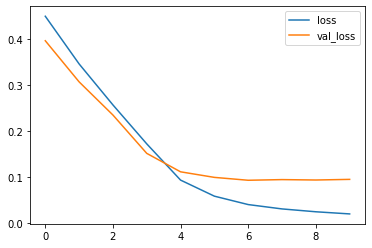

In [51]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

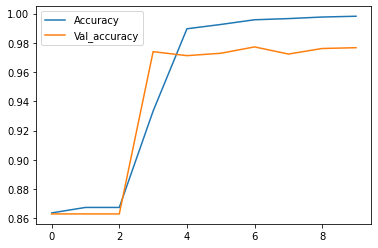

In [52]:
plt.figure()
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Val_accuracy')
plt.legend()
plt.show()
